In [2]:
import numpy as np
import cPickle as pickle
import matplotlib.pyplot as plt
import nonlinearFilters
import linearFilters

In [4]:
# Load the training data
with open('train_data.p', 'r') as fp:
    training_set = pickle.load(fp)
# Load the test data
with open('test_data.p', 'r') as fp:
    test_set = pickle.load(fp)
# Load gold standard points
with open('pt_true_bgm.p', 'r') as fp:
    gs_points = pickle.load(fp)

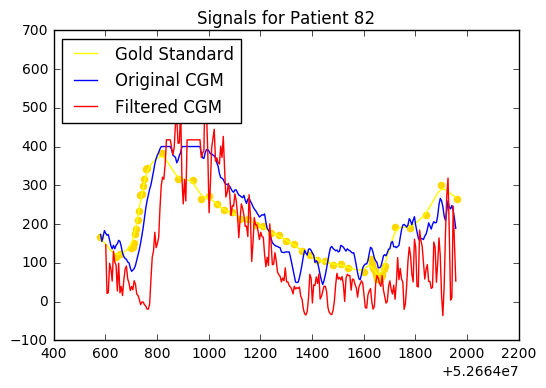

In [42]:
# Test the volterra LMS filter

verbose = True
reload(nonlinearFilters)
reload(linearFilters)
a = nonlinearFilters.alpha_LMS_Volterra_filter(training_set, alpha=0.2, num_tap=5, order=2,  bias=True, causal=True, delay=0)
#b = linearFilters.alpha_LMS_filter(training_set, alpha=0.2, num_weight=5, bias=True, causal=True, delay=0)
a.train(num_repeat=10)
#b.train(num_repeat=10)

for idx in test_set.keys()[0:1]:
    data = test_set[idx]
    timepoints = data[:,0]
    cgm = data[:,1]
    bgm = data[:,2]
    filtered_cgm_a = a.apply_filter(cgm)
    #filtered_cgm_b = b.apply_filter(cgm)
    if verbose:
        # plot results
        plt.scatter(gs_points[idx][:,0], gs_points[idx][:,1], color='gold') #true gs points
        plt.plot(timepoints,bgm, color='yellow', label='Gold Standard') # interpolated gs signal
        plt.plot(timepoints,cgm, color='blue', label='Original CGM') #cgm signal
        plt.plot(timepoints, filtered_cgm_a, color='red', label='Filtered CGM') #filtered cgm signal
        #plt.plot(timepoints, filtered_cgm_b, color='green') #filtered cgm signal
        plt.legend(loc='upper left')
        plt.title('Signals for Patient ' + str(idx))
        plt.show()

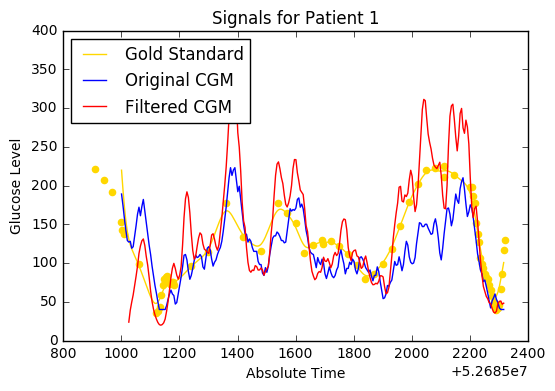

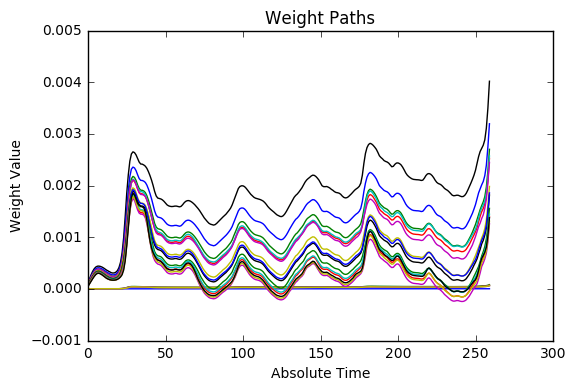

In [37]:
# Test the volterra LMS filter patient by patient

verbose = True
reload(nonlinearFilters)
num_taps = 5
a = nonlinearFilters.alpha_LMS_Volterra_filter(training_set, alpha=0.2, num_tap=num_taps, order=2,  bias=True, causal=True, delay=0)
num_weights = a.num_weight+1*a.bias
for pid in training_set.keys()[0:10]:
    a.reset_weight()
    weight_path, predicted = a.train_single_patient(pid)
    if verbose:
        plt.scatter(gs_points[pid][:,0], gs_points[pid][:,1], color='gold') #true gs points
        plt.plot(training_set[pid][:,0],training_set[pid][:,2], color='gold', label='Gold Standard') # interpolated gs signal
        plt.plot(training_set[pid][:,0],training_set[pid][:,1], color='blue', label='Original CGM') #cgm signal
        plt.plot(training_set[pid][:,0], predicted, color='red', label='Filtered CGM') #filtered cgm signal
        plt.title('Signals for Patient ' + str(pid))
        plt.legend(loc='upper left')
        plt.xlabel('Absolute Time')
        plt.ylabel('Glucose Level')
        plt.show()
        
        weight_path = np.transpose(np.reshape(np.concatenate(weight_path), (len(weight_path), num_weights)))
        for row in range(weight_path.shape[0]):
            plt.plot(weight_path[row, :])
            plt.xlabel('Absolute Time')
            plt.ylabel('Weight Value')
            plt.title('Weight Paths')
        plt.show()
        break
    